### Importación de Tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

### Importación de datos

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Verificando los datos de prueba

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

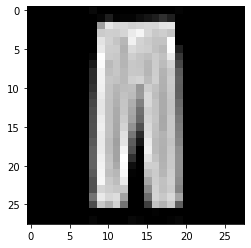

In [6]:
imagendemo = x_train[21]
plt.imshow(imagendemo, cmap = 'gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) 
      for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   02295   0   0   0   0   0   0   0   0   0   01020   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   015307650 76510201020331553557650124957905   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   040290583955457054825530405406054825545705788558140   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   051510525305227554060594156222054570510005227549980   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   057630530404998046410612005380551510494704947064260   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0591605202051765448805533553040522754896046920640057905   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   020406451551510507454590052275499804845051510489605941514535   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   066306375047175502354590050745499804641051765476855329518360   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   01

## Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [9]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
x_train.shape

(60000, 784)

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [11]:
# Onehot encode
onehot_encoder = OneHotEncoder(sparse = False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [0]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1 = 131,
               n_classes = 10):
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1), name = "hl1weigths", dtype = "float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1), name = "hl1bias", dtype = "float32")

    self.outW = tf.Variable(np.random.rand(n_nodes_hl1, n_classes), name = "outweigths", dtype = "float32")
    self.outB = tf.Variable(np.random.rand(n_classes), name = "outbias", dtype = "float32")

    self.trainable_variables =[self.h1LW, self.h1LB, self.outW, self.outB]      
        
  def __call__(self,x): 
      # Declarando la arquitectura
      l1 = tf.add(tf.matmul(x, self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      output = tf.add(tf.matmul(l1, self.outW), self.outB)
      return output

In [13]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[12498.178 , 11769.863 , 11177.665 , 10598.262 , 10527.034 ,
        11500.916 , 11000.127 , 10725.069 , 12613.652 , 11512.872 ],
       [ 9174.167 ,  8615.155 ,  8192.241 ,  7758.762 ,  7698.163 ,
         8412.99  ,  8048.5938,  7849.7114,  9237.402 ,  8431.08  ],
       [10300.467 ,  9706.8125,  9210.388 ,  8742.34  ,  8664.378 ,
         9491.014 ,  9049.148 ,  8844.222 , 10400.695 ,  9491.858 ],
       [15152.684 , 14283.669 , 13549.22  , 12862.988 , 12767.616 ,
        13951.314 , 13339.047 , 12996.014 , 15293.648 , 13963.573 ],
       [ 8319.1045,  7832.9814,  7440.9937,  7056.741 ,  7005.5703,
         7660.2104,  7324.6426,  7142.6533,  8387.936 ,  7659.587 ],
       [13089.123 , 12339.199 , 11704.997 , 11112.593 , 11016.454 ,
        12056.819 , 11524.567 , 11252.299 , 13219.572 , 12061.301 ]],
      dtype=float32)>

Seleccionar un optimizador 

In [0]:
#Adam Optimizer
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001)

### Definir las metricas a usar

In [0]:
#Metricas: Media y Categorical Accuracy
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'test_accuracy')

### Calculo de gradientes y ajuste 

In [0]:
@tf.function
def train_step(model, tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #Funcion de error: Softmax Cross Entropy
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  #Funcion de error: Softmax Cross Entropy
  t_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

## función de entrenamiento  y prueba

In [0]:
def fitting(model, train_x, train_y, test_x, test_y, EPOCHS, N_batch, batch_size):
  for epoch in range(EPOCHS):
    i = 0
    while i + batch_size < len(train_x) or i + batch_size < batch_size * N_batch:
      start = i
      end = i + batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model, batch_x, batch_y)
      i += batch_size

    test_step(model, test_x, test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch + 1, train_loss.result(), train_accuracy.result() * 100, test_loss.result(), test_accuracy.result() * 100))
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [19]:
fitting(DNN, x_train, y_train_onehot, x_test, y_test_onehot, 10, 600, 100)

Epoch 1, Perdida: 28.278133392333984, Exactitud: 63.317195892333984, Perdida de prueba: 1.8531044721603394, Exactitud de prueba: 70.6500015258789
Epoch 2, Perdida: 1.305907964706421, Exactitud: 75.76961517333984, Perdida de prueba: 1.2653638124465942, Exactitud de prueba: 74.51000213623047
Epoch 3, Perdida: 1.199181079864502, Exactitud: 77.89148712158203, Perdida de prueba: 1.2093945741653442, Exactitud de prueba: 75.87000274658203
Epoch 4, Perdida: 1.157359004020691, Exactitud: 78.83639526367188, Perdida de prueba: 1.4302153587341309, Exactitud de prueba: 74.43000030517578
Epoch 5, Perdida: 1.1555194854736328, Exactitud: 79.45408630371094, Perdida de prueba: 1.2026088237762451, Exactitud de prueba: 77.77999877929688
Epoch 6, Perdida: 1.0985724925994873, Exactitud: 79.9599380493164, Perdida de prueba: 1.2504668235778809, Exactitud de prueba: 76.95999908447266
Epoch 7, Perdida: 1.1417081356048584, Exactitud: 79.71452331542969, Perdida de prueba: 1.1721388101577759, Exactitud de prueba: 